Методы кластеризации и оценка качества кластеризации

Загрузите набор данных из файла cluster datasets в соответствии с вашим вариантом (если считаете, что набор данных не представляет необходимой информации или сложен для интерперетации или, то можно выбрать другой - но необходимо предварительное согласование).

In [3]:
!pip3 install --upgrade pip
!pip3 install pandas
!pip3 install matplotlib
!pip3 install zipfile36==0.1.3
!pip3 install seaborn
!pip3 install numpy
!pip3 install scikit-learn
!pip install kaggle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.3 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


In [4]:
! mkdir ~/.kaggle

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json
! kaggle datasets download arnabchaki/data-science-salaries-2023

  0% 0.00/25.4k [00:00<?, ?B/s]
100% 25.4k/25.4k [00:00<00:00, 43.0MB/s]


In [7]:
! unzip data-science-salaries-2023.zip

Archive:  data-science-salaries-2023.zip
  inflating: ds_salaries.csv         


In [8]:
import pandas as pd
import seaborn as sns
import matplotlib
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('ds_salaries.csv')
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


Используйте представленные в практике методы кластеризации (помните, что кластеры строятся по классам).

Несколько правил перед выполнением задания: 0. Внимательно изучить практику 4!

Служебные комментарии читать внимательно и не удалять
Выполнить до 10-11-2023 (но не затягивать, таск не простой!)
P.S. Мгномерные данные - данные, в которых количество колонок > 3

P.S.S. Служебные комментарии - ячейки с описанием задачи в """ task description """

"""
Предварительно - оптимизируйте ваш набор данных.
1. Удалить лишние колонки (порядковые признаки, с множеством пропусков, с кучей выбросов, ....)
2. Обработайте выбросы и пропуски (Для удобства - ваш коллега сделал библиотеку в pypi для анализа выбросов - подробности уточняйте в группе)
3. Скопируйте df в df_cluster # df_cluster = df.copy()
далее вы работаете с ним
4. Выполните масштабирование числовых признаков StandatdScaler || MinMaxScaler, в df_cluser замените числовые признаки на отмасштабированные
5. Для кагегориальных значений используйте LabelEncoder - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html. В df_cluster замените на encoded признаки
"""

In [24]:
df.info()#пустых данных нет

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


<Axes: >

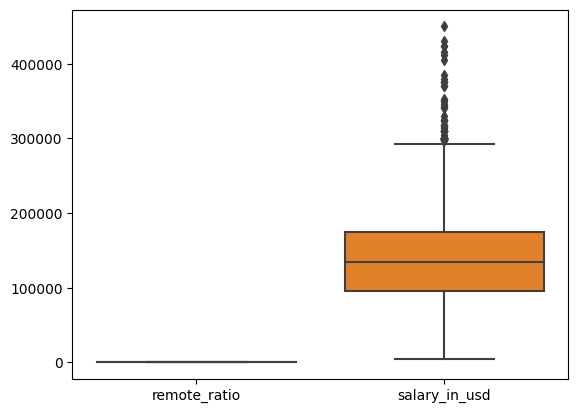

In [46]:
#выбрал эти данные так как хочу разбить продукты на кластеры(по цене, и весу)
df_selected = df[['remote_ratio', 'salary_in_usd']].copy()

# выбросов нет
sns.boxplot(data=df_selected)


In [53]:
df_cluster

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


array([[<Axes: title={'center': 'work_year'}>,
        <Axes: title={'center': 'salary'}>],
       [<Axes: title={'center': 'salary_in_usd'}>,
        <Axes: title={'center': 'remote_ratio'}>]], dtype=object)

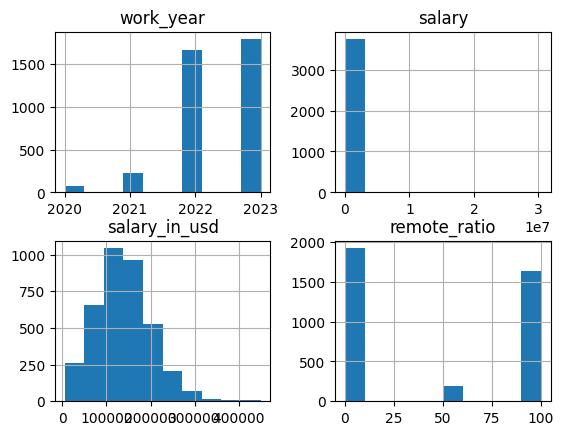

In [56]:
df_cluster.hist()

тут я преобразила свой датасет, сначала я удалила все коллонки в который было очень много выбросов и скопировала дф в дф кластер, чуть ниже можно увидеть как я маштабировала числовые признаки

In [63]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
num_features = df_cluster.select_dtypes(include=['int']).columns


In [64]:
standard_scaler = StandardScaler()
st_scaler = df_cluster.copy()
st_scaler[num_features] = standard_scaler.fit_transform(df_cluster[num_features])
st_scaler["work_year"].unique()

array([ 0.90599446, -0.54043802, -3.43330297, -1.9868705 ])

In [66]:

scaler_minmax = MinMaxScaler()
min_max_scaler = df_cluster.copy()
min_max_scaler[num_features] = scaler_minmax.fit_transform(df_cluster[num_features])
min_max_scaler["salary"].unique()

array([2.43469106e-03, 7.89629532e-04, 6.41573995e-04, 5.56030796e-03,
       3.75074028e-03, 7.11324604e-03, 4.27715997e-03, 7.00796210e-03,
       4.44166612e-03, 4.64236362e-03, 2.78673422e-03, 4.07975258e-03,
       3.09271567e-03, 6.83226953e-03, 4.10475752e-03, 5.39580180e-03,
       4.73777719e-03, 3.42172797e-03, 8.85043101e-03, 5.52740673e-03,
       7.36987563e-03, 4.51404883e-03, 7.20536948e-03, 4.94834507e-03,
       6.38283872e-03, 2.76370336e-03, 2.17148121e-03, 8.13318418e-03,
       1.10814634e-02, 5.87583076e-03, 5.14904257e-03, 3.26972429e-03,
       1.92472198e-03, 5.40896230e-02, 6.53484240e-03, 3.44410081e-03,
       8.70905442e-03, 7.08968875e-03, 6.80232941e-03, 5.88932026e-03,
       8.42271501e-03, 7.86339409e-03, 8.86030138e-03, 5.83996841e-03,
       6.99151148e-03, 6.35316181e-03, 6.49141278e-03, 3.86918471e-03,
       6.02454432e-03, 4.37586366e-03, 8.31578601e-03, 7.41922748e-03,
       5.26419688e-03, 5.47805488e-03, 3.43817859e-03, 7.63308548e-03,
      

In [68]:
scaler_minmax = MinMaxScaler()
min_max_scaler = df_cluster.copy()
min_max_scaler[num_features] = scaler_minmax.fit_transform(df_cluster[num_features])
min_max_scaler["salary_in_usd"].unique()

array([0.18143584, 0.05589973, 0.04578437, ..., 0.05223347, 0.9145814 ,
       0.20125745])

In [69]:
scaler_minmax = MinMaxScaler()
min_max_scaler = df_cluster.copy()
min_max_scaler[num_features] = scaler_minmax.fit_transform(df_cluster[num_features])
min_max_scaler["remote_ratio"].unique()

array([1. , 0. , 0.5])

In [70]:

"""
Здесь k-means и метрики. Используйте несколько вариантов метрик (из практики), для поиска оптимального числа кластеров.
"""
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score,silhouette_score,davies_bouldin_score

Оптимальное число кластеров Calinski Harabasz Score 9, с баллом 2782.0131748917183
Оптимальное число кластеров Silhouette Score 2, с баллом 0.01390015900721838
Оптимальное число кластеров Davies Bouldin Score 4, с баллом 2.1978509969705087


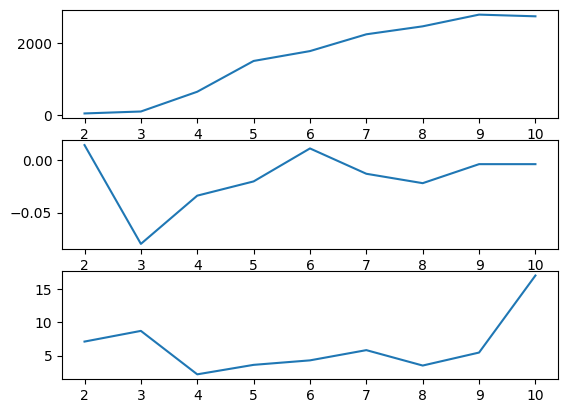

In [74]:
# your_code here
score_1 = []
score_2 = []
score_3 = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(min_max_scaler_modified)  # Fix the variable name here
    score_1.append(calinski_harabasz_score(df_selected, kmeans.labels_))  # Fix the variable name here
    score_2.append(silhouette_score(df_selected, kmeans.labels_))  # Fix the variable name here
    score_3.append(davies_bouldin_score(df_selected, kmeans.labels_))  # Fix the variable name here

print(f"Оптимальное число кластеров Calinski Harabasz Score {score_1.index(max(score_1)) + 2}, с баллом {max(score_1)}")
print(f"Оптимальное число кластеров Silhouette Score {score_2.index(max(score_2)) + 2}, с баллом {max(score_2)}")
print(f"Оптимальное число кластеров Davies Bouldin Score {score_3.index(min(score_3)) + 2}, с баллом {min(score_3)}")

fig, axs = plt.subplots(nrows=3, ncols=1)
axs[0].plot(range(2, 11), score_1)
axs[1].plot(range(2, 11), score_2)
axs[2].plot(range(2, 11), score_3)
# plt.show()


Было выбрано 4 кластера так как все метрикм сказали что 4 это оптимальный

Text(0.5, 1.0, 'Распределение данных в двумерном пространстве')

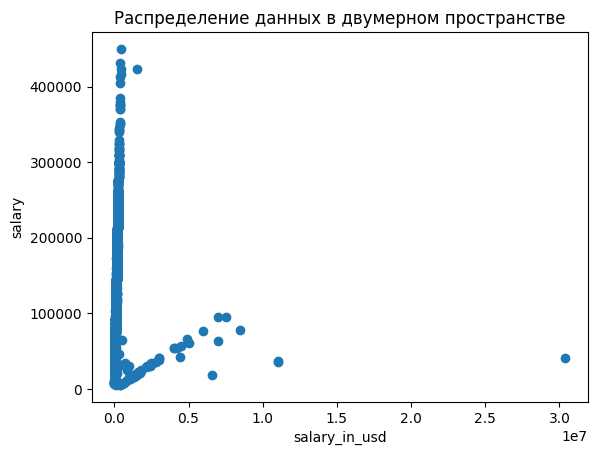

In [75]:
plt.scatter(df["salary"], df["salary_in_usd"])
plt.xlabel('salary_in_usd')
plt.ylabel('salary')
plt.title('Распределение данных в двумерном пространстве')

In [76]:
X = df[["salary", "salary_in_usd"]]
X

,salary,salary_in_usd
0,80000,85847
1,30000,30000
2,25500,25500
3,175000,175000
4,120000,120000
...,...,...
3750,412000,412000
3751,151000,151000
3752,105000,105000
3753,100000,100000


In [80]:
# Создаем экземпляр модели K-Means
kmeans_instance = KMeans(n_clusters=2)  # Изменено имя переменной

# Производим кластеризацию данных
kmeans_instance.fit(X)

# Получаем центры кластеров и прогнозируем принадлежность к кластерам
cluster_centers_result = kmeans_instance.cluster_centers_  # Изменено имя переменной
cluster_labels_result = kmeans_instance.labels_  # Изменено имя переменной

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [81]:
print(cluster_centers) # центры кластеров в двумерном пространстве

[[  165793.34543513   137757.5181527 ]
 [10555555.55555555    59683.44444444]]


In [82]:
print(cluster_labels) #  центры кластеров в двумерном пространстве


[0 0 0 ... 0 0 1]


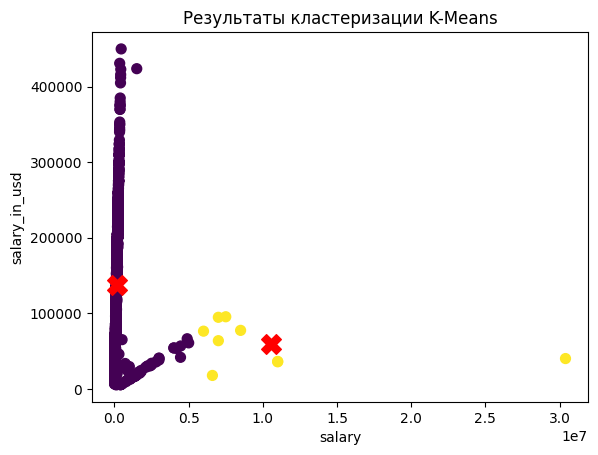

In [83]:
# Визуализируем результаты кластеризации двумерной кластеризации

# Измененные имена переменных
plt.scatter(df["salary"], df["salary_in_usd"], c=cluster_labels_result, s=50, cmap='viridis')
plt.scatter(cluster_centers_result[:, 0], cluster_centers_result[:, 1], c='red', s=200, marker='X')

# Добавлены подписи к осям и заголовок
plt.xlabel('salary')
plt.ylabel('salary_in_usd')
plt.title('Результаты кластеризации K-Means')

# Показываем график
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


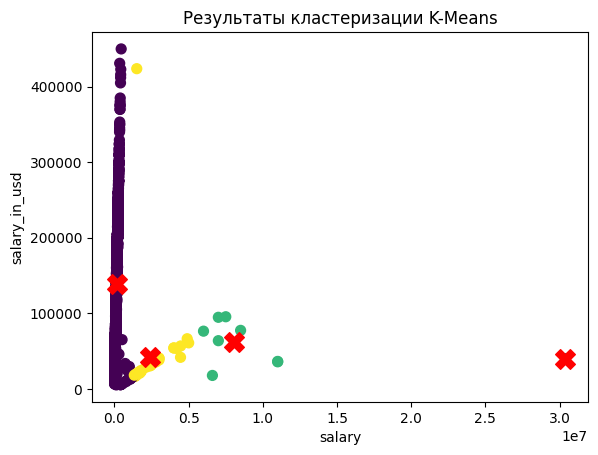

In [84]:
# Создаем экземпляр модели K-Means
kmeans_instance_modified = KMeans(n_clusters=4)  # Изменено имя переменной

# Производим кластеризацию данных
kmeans_instance_modified.fit(X)

# Получаем центры кластеров и прогнозируем принадлежность к кластерам
cluster_centers_modified = kmeans_instance_modified.cluster_centers_  # Изменено имя переменной
cluster_labels_modified = kmeans_instance_modified.labels_  # Изменено имя переменной

# Визуализируем результаты кластеризации
plt.scatter(df["salary"], df["salary_in_usd"], c=cluster_labels_modified, s=50, cmap='viridis')
plt.scatter(cluster_centers_modified[:, 0], cluster_centers_modified[:, 1], c='red', s=200, marker='X')

# Добавлены подписи к осям и заголовок
plt.xlabel('salary')
plt.ylabel('salary_in_usd')
plt.title('Результаты кластеризации K-Means')

# Показываем график
plt.show()


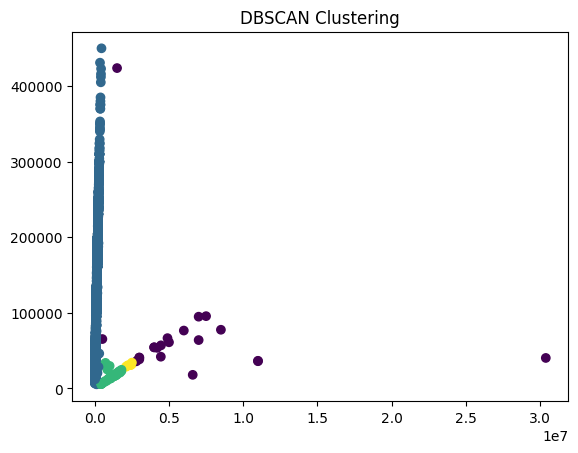

In [86]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# Измененные имена переменных
x_scaler_modified = StandardScaler().fit_transform(X)

# Инициализация и обучение модели DBSCAN
dbscan_instance = DBSCAN(eps=0.35, min_samples=5)  # Изменено имя переменной
dbscan_instance.fit(x_scaler_modified)

# Получение меток кластеров для каждой точки (-1 означает выбросы)
labels_modified = dbscan_instance.labels_  # Изменено имя переменной

# Визуализация результатов, темные точки - выбросы
plt.scatter(X.to_numpy()[:, 0], X.to_numpy()[:, 1], c=labels_modified, cmap='viridis')

# Добавлен заголовок
plt.title('DBSCAN Clustering')

# Показываем график
plt.show()

Используйте представленные в практике методы кластеризации (помните, что кластеры строятся по классам).

Несколько правил перед выполнением задания: 0. Внимательно изучить практику 4!

Служебные комментарии читать внимательно и не удалять
Выполнить до 10-11-2023 (но не затягивать, таск не простой!)
P.S. Мгномерные данные - данные, в которых количество колонок > 3

P.S.S. Служебные комментарии - ячейки с описанием задачи в """ task description """


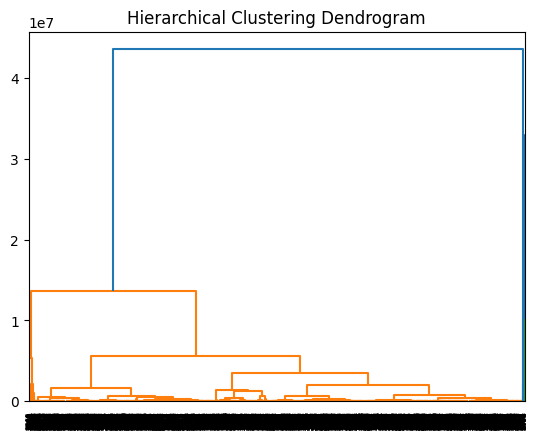

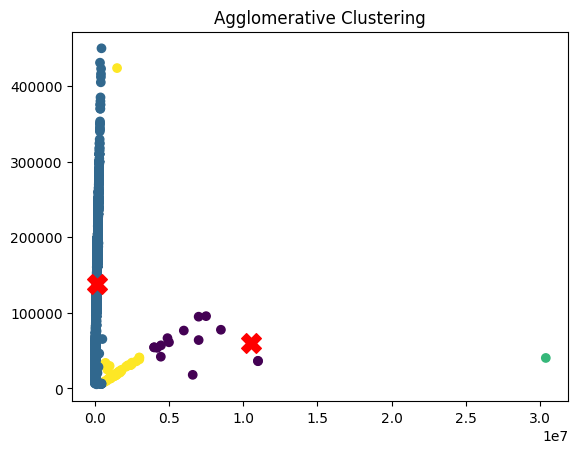

In [88]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

# Измененные имена переменных
agg_clustering_instance = AgglomerativeClustering(n_clusters=4)  # Изменено имя переменной
agg_clustering_instance.fit(X)

# Визуализация дендрограммы
linkage_matrix = hierarchy.linkage(X, method='ward')
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

# Визуализация результатов кластеризации
plt.scatter(X.to_numpy()[:, 0], X.to_numpy()[:, 1], c=agg_clustering_instance.labels_, cmap='viridis')
plt.scatter(cluster_centers_result[:, 0], cluster_centers_result[:, 1], c='red', s=200, marker='X')  # Изменено имя переменной
plt.title('Agglomerative Clustering')
plt.show()


"""
Здесь иерархическая кластеризация и метрики
"""
     

"""
Здесь визуализация кластеров иерархической кластеризации
(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)
"""
     
Если что на эти два пункта код выше, я просто решила все в один засунуть чтоб не дробить. Иерархическая кластеризация если что 1 график, а визуализация кластеров иерархической кластеризации 2 ( я еще туда добавила крестики чтобы было видно центры кластеризации)

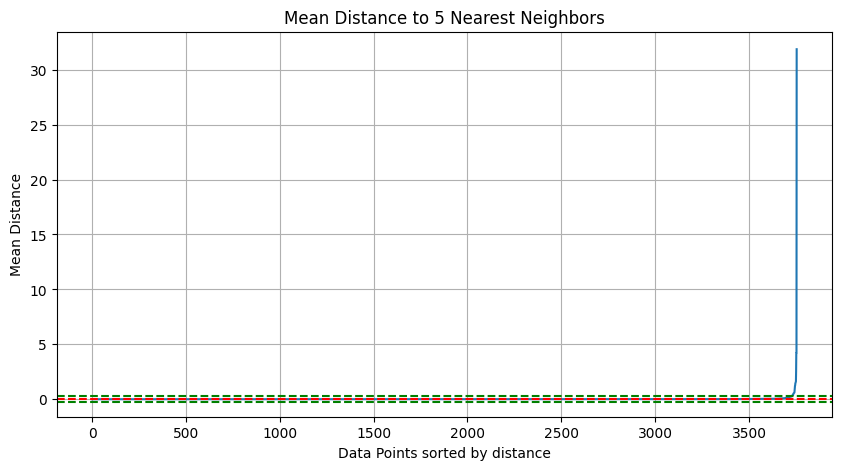

Оптимальный EPS = 0.0207549396678201


In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Изменил имя переменной для отражения её назначения
X_scaled = StandardScaler().fit_transform(X)

# Создаем пустой список, в который будем добавлять средние расстояния
neighbours_distances = []

# Проходимся по каждой строке в исходном DataFrame
for i, point_i in enumerate(X_scaled):
    # Вычисляем расстояния от текущей точки до всех остальных
    distances_to_other_points = [np.linalg.norm(point_i - point_j) for j, point_j in enumerate(X_scaled) if i != j]
    # Вычисляем среднее расстояние до 5 ближайших соседей
    neighbours_distances.append(np.mean(sorted(distances_to_other_points)[:5]))

# Сортируем средние расстояния
neighbours_distances = sorted(neighbours_distances)

# Строим график
plt.figure(figsize=(10, 5))
plt.plot(range(len(neighbours_distances)), neighbours_distances)
plt.title('Mean Distance to 5 Nearest Neighbors')
plt.xlabel('Data Points sorted by distance')
plt.ylabel('Mean Distance')
plt.grid(True)

# Добавляем линию среднего, которая показывает примерно оптимальный EPS
plt.axhline(y=np.mean(neighbours_distances) + np.std(neighbours_distances) / 2, color='g', linestyle='--')
plt.axhline(y=np.mean(neighbours_distances), color='r', linestyle='--')
plt.axhline(y=np.mean(neighbours_distances) - np.std(neighbours_distances) / 2, color='g', linestyle='--')

# зеленым отмечаем ПРИМЕРНУЮ графику оптимального EPS, но это не является стандартным методом, это скорее интуитивная картинка
# основной смысл в том, что мы ищем то значение, в котором изменение значения по графику становится "стабильным"
plt.show()

print(f'Оптимальный EPS = {np.mean(neighbours_distances)}')


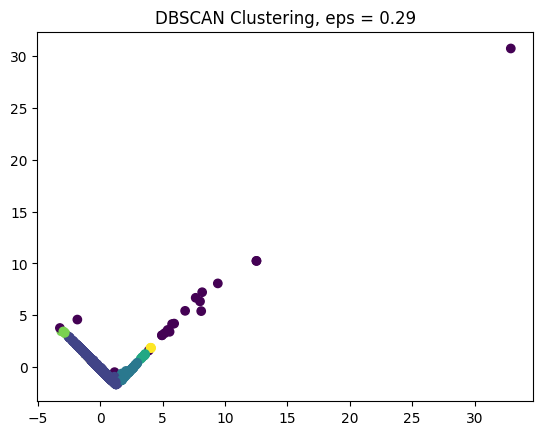

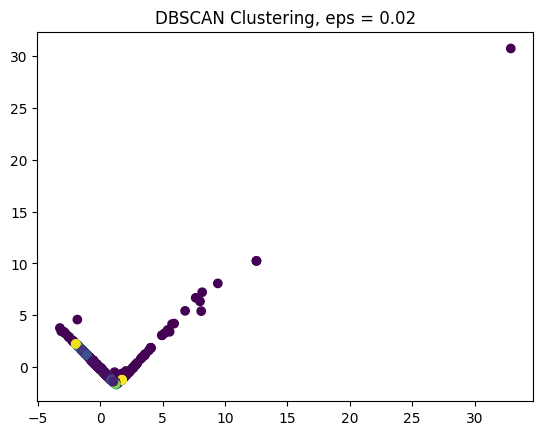

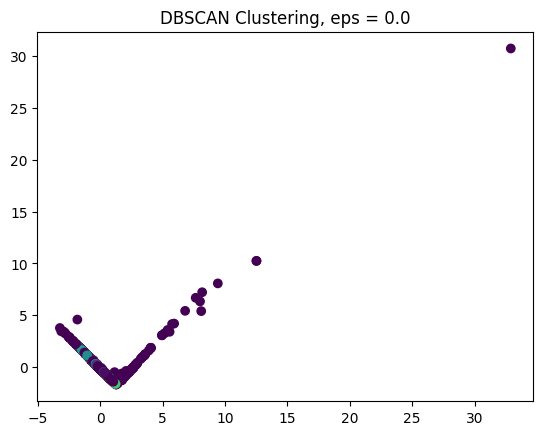

In [98]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

# Assuming X_scaled is replaced with X_modified
X_modified = StandardScaler().fit_transform(X)

# Создаем объект PCA и снижаем размерность до 2 компонент, чтобы визуализировать на двумерном графике
pca_instance = PCA(n_components=2)
data_pca = pca_instance.fit_transform(X_modified)  # Изменено имя переменной

for eps in [np.mean(neighbours_distances) + np.std(neighbours_distances) / 2, np.mean(neighbours_distances), np.mean(neighbours_distances) - np.std(neighbours_distances) / 2]:
    eps = max(eps, 1e-6)  # Ensure eps is not zero
    # Инициализация и обучение модели DBSCAN
    dbscan_instance = DBSCAN(eps=eps, min_samples=3)
    dbscan_instance.fit(X_modified)  # Изменено имя переменной
    labels = dbscan_instance.labels_

    # Визуализация результатов, темные точки - выбросы
    plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels, cmap='viridis')
    plt.title(f'DBSCAN Clustering, eps = {round(eps, 2)}')
    plt.show()


In [100]:
feature_1 = df["work_year"]
feature_2 = df["salary"]
feature_3 = df["salary_in_usd"]
features = np.array([[i, j, k] for i, j, k in zip(feature_1, feature_2, feature_3)])
features_scaled = StandardScaler().fit_transform(features)
features_scaled[:5]

array([[ 0.90599446, -0.16482684, -0.82039118],
       [ 0.90599446, -0.23927735, -1.70618745],
       [ 0.90599446, -0.2459779 , -1.77756251],
       [ 0.90599446, -0.02337087,  0.59367574],
       [ 0.90599446, -0.10526643, -0.27868616]])

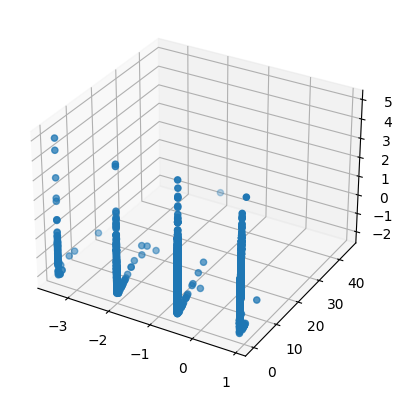

In [101]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(features_scaled[:, 0], features_scaled[:, 1], features_scaled[:, 2])

Text(0.5, 1.0, 'Результат PCA (2 компоненты)')

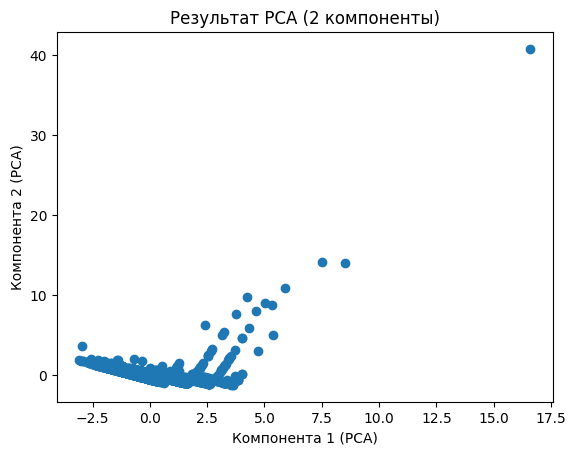

In [102]:
# Создаем объект PCA и снижаем размерность до 2 компонент
pca_instance = PCA(n_components=2)
data_pca = pca_instance.fit_transform(features_scaled)

# Восстановим данные обратно в исходное пространство (для демонстрации)
data_restored = pca_instance.inverse_transform(data_pca)
plt.scatter(data_pca[:, 0], data_pca[:, 1])
plt.xlabel('Компонента 1 (PCA)')
plt.ylabel('Компонента 2 (PCA)')
plt.title('Результат PCA (2 компоненты)')

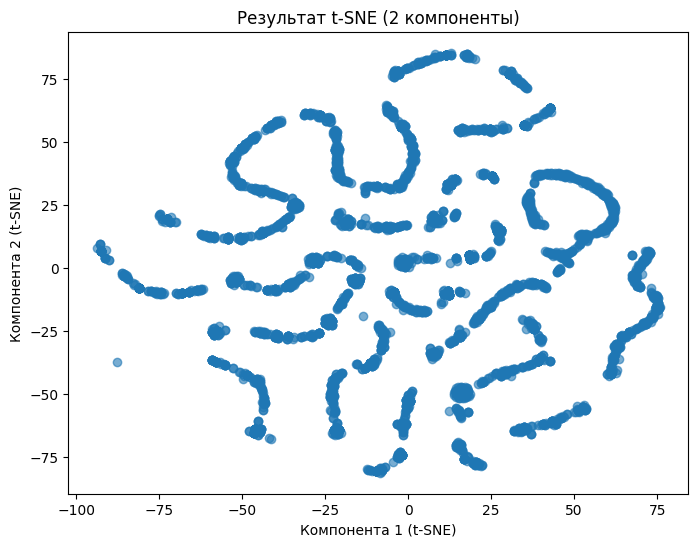

In [106]:
# Создаем объект t-SNE и снижаем размерность до 2 компонент
tsne_instance = TSNE(n_components=2)
data_tsne_modified = tsne_instance.fit_transform(features_scaled)

# Визуализируем данные после применения t-SNE
plt.figure(figsize=(8, 6))
plt.scatter(data_tsne_modified[:, 0], data_tsne_modified[:, 1], alpha=0.6)
plt.xlabel('Компонента 1 (t-SNE)')
plt.ylabel('Компонента 2 (t-SNE)')
plt.title('Результат t-SNE (2 компоненты)')
plt.show()
